In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
df= pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [5]:
df.shape

(3000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df.describe(include = 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = {}'.format(dups.sum()))

Number of duplicate rows = 139


In [10]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [11]:
for column in df.select_dtypes(include = 'object'):
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [12]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

## Univariate and Bivariate analysis

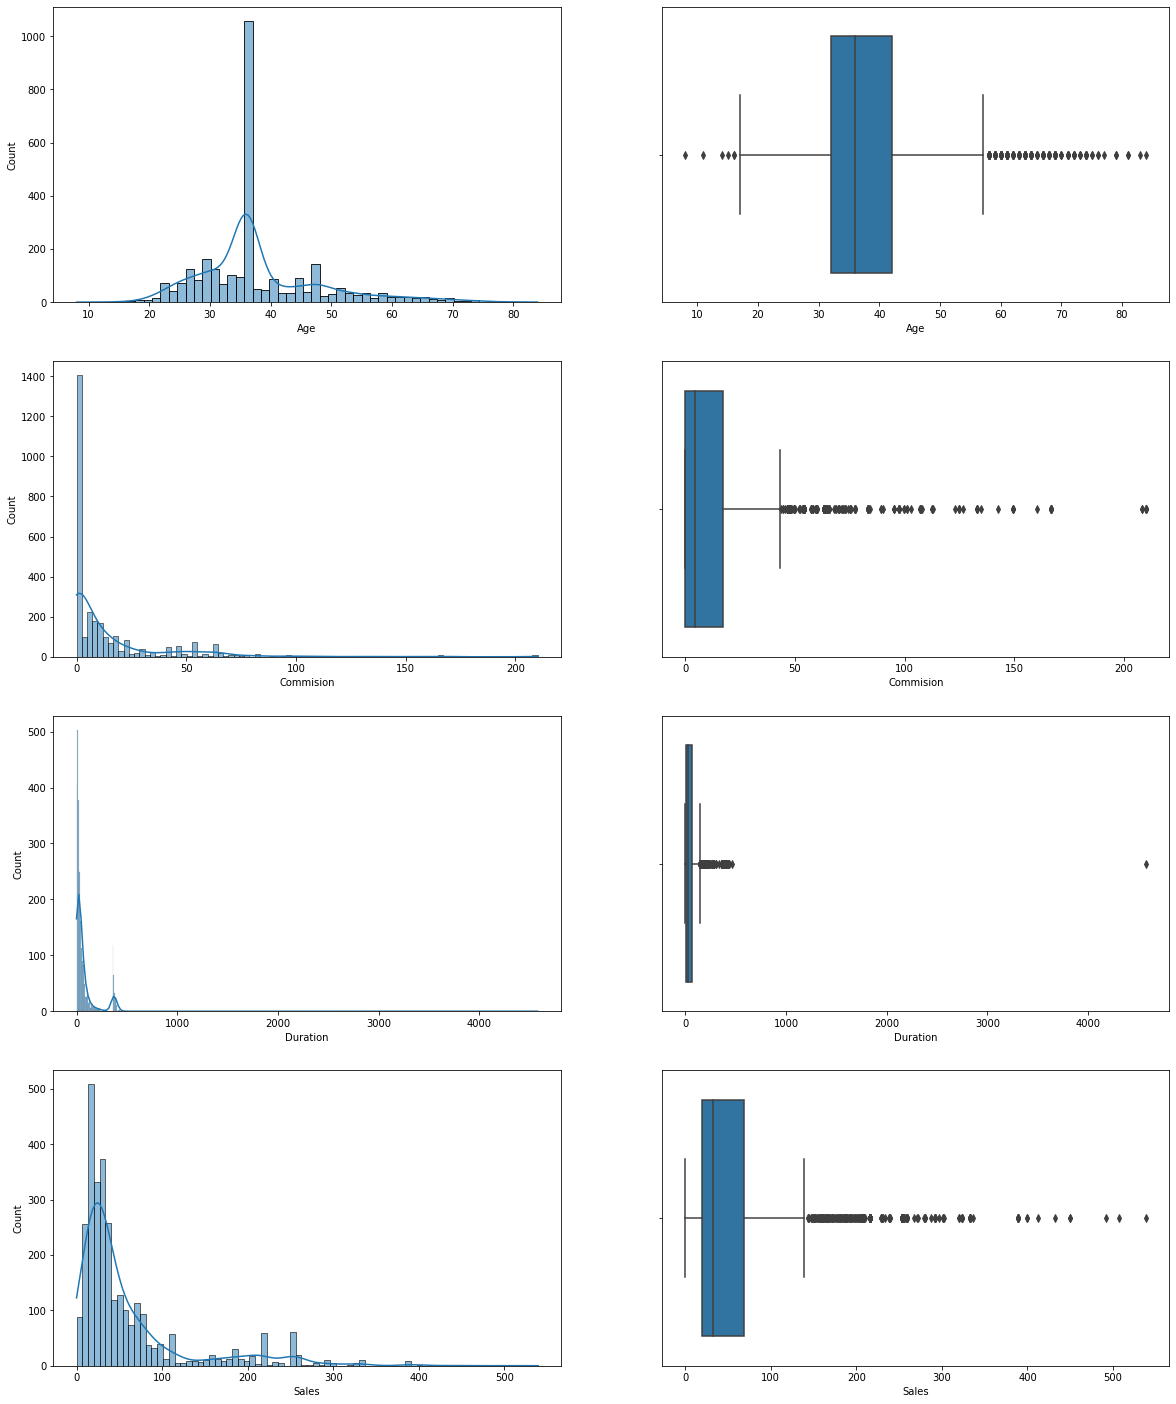

In [13]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)

a = sns.histplot(data = df , x = 'Age', kde = True, ax=axes[0][0])


a = sns.boxplot(x = df['Age']  , ax=axes[0][1])


a = sns.histplot(df['Commision'], kde = True, ax=axes[1][0])


a = sns.boxplot(x = df['Commision']  , ax=axes[1][1])


a = sns.histplot(df['Duration'],  kde = True, ax=axes[2][0])


a = sns.boxplot(x = df['Duration']  , ax=axes[2][1])


a = sns.histplot(df['Sales'],  kde = True, ax=axes[3][0])


a = sns.boxplot(x = df['Sales']  , ax=axes[3][1])


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

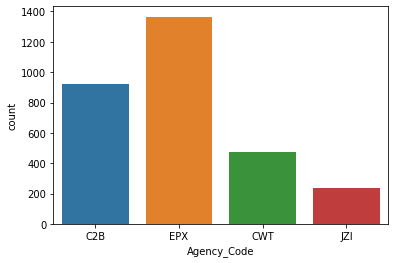

In [14]:
sns.countplot(data = df , x = 'Agency_Code')

<AxesSubplot:xlabel='Type', ylabel='count'>

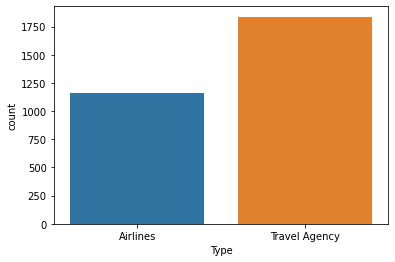

In [15]:
sns.countplot(data = df , x = 'Type')

<AxesSubplot:xlabel='Claimed', ylabel='count'>

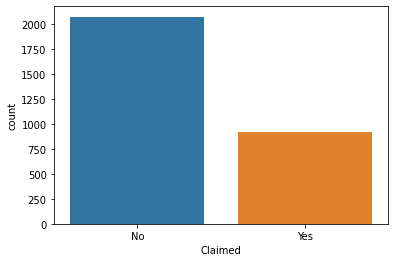

In [16]:
sns.countplot(data = df , x = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

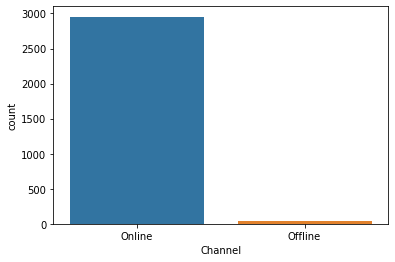

In [17]:
sns.countplot(data = df , x = 'Channel')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

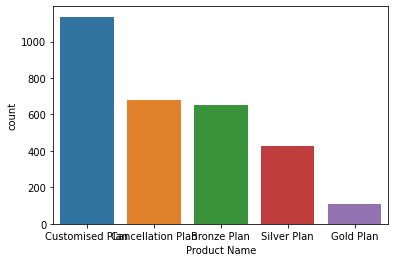

In [18]:
sns.countplot(data = df , x = 'Product Name')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

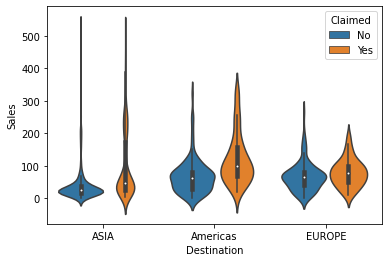

In [19]:
sns.violinplot(data = df , x = 'Destination', y = 'Sales' , hue = 'Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

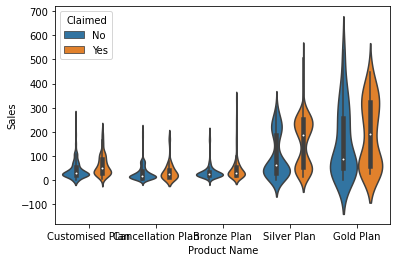

In [20]:
sns.violinplot(data = df , x = 'Product Name', y = 'Sales' , hue = 'Claimed')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

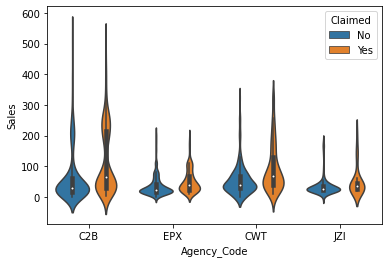

In [21]:
sns.violinplot(data = df , x = 'Agency_Code', y = 'Sales' , hue = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

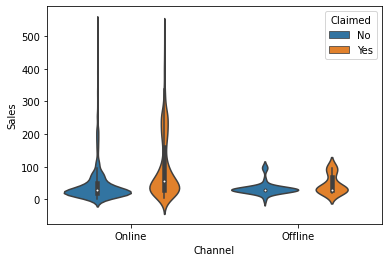

In [22]:
sns.violinplot(data = df , x = 'Channel', y = 'Sales' , hue = 'Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

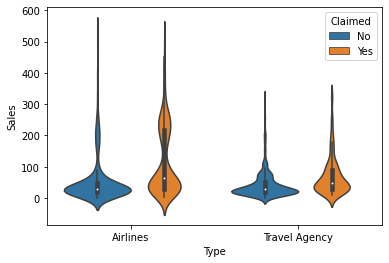

In [23]:
sns.violinplot(data = df , x = 'Type', y = 'Sales' , hue = 'Claimed')

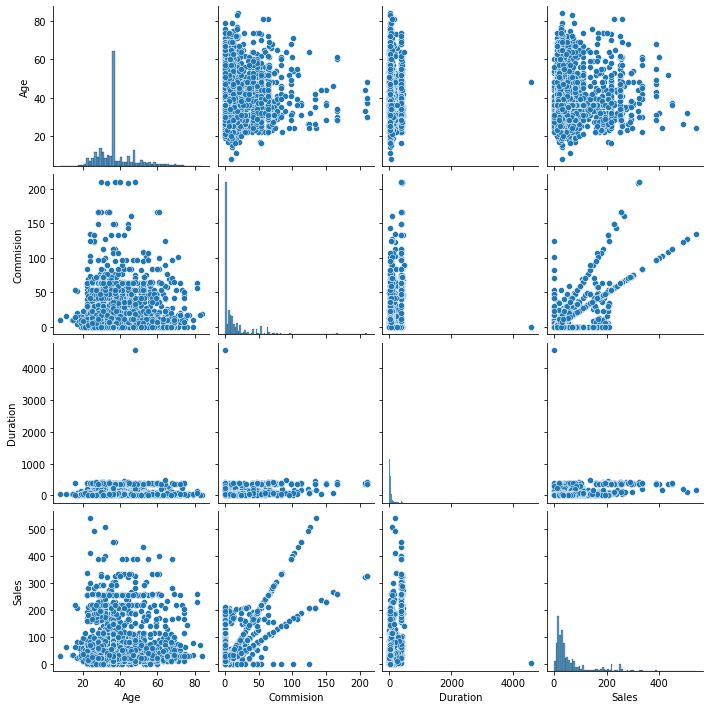

In [24]:
sns.pairplot(df)

<AxesSubplot:>

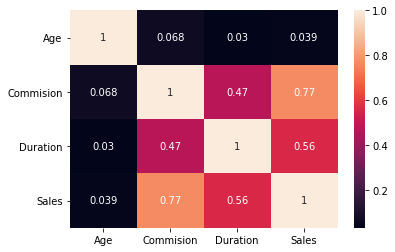

In [25]:
sns.heatmap(df.corr(),annot =True)

## Converting into categorical

In [26]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [27]:
df_original = df.copy()

In [28]:
 df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportions of 1s and 0s

In [29]:
df.rename(columns = {'Product Name':'Product_Name'}, inplace = True)

In [30]:
df.Claimed.value_counts(normalize = True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [31]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## DATA SPLIT

In [32]:
X = df.drop('Claimed', axis = 1)
y = df.pop('Claimed')

In [33]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 3000, dtype: int8

## SPLIT DATA

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Checking the dimensions of the training and test data

In [36]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 11548


## Decision TreeClassifier

In [37]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [38]:
dt_model.fit(X_train, train_labels)


DecisionTreeClassifier()

### CHECKING THE FEATURE

In [39]:
print( pd.DataFrame(dt_model.feature_importances_,columns = ["Imp"], index = X_train.columns).sort_values('Imp', ascending = False))

                   Imp
Duration      0.255338
Sales         0.199201
Agency_Code   0.195613
Age           0.182322
Commision     0.100680
Product_Name  0.039575
Destination   0.020010
Channel       0.007262
Type          0.000000


### GRID SEARCH FOR BEST PARAMETERS

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[20,40,60,80],
    'min_samples_split':[150,200,250,300]
}

In [41]:
dt_model = DecisionTreeClassifier()

In [42]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid , cv = 10 )

In [43]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [20, 40, 60, 80],
                         'min_samples_split': [150, 200, 250, 300]})

In [44]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 150}

#### REGULARISING THE DECISION TREE, ADDING TUNING PARAMETERS

In [45]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_leaf=20,min_samples_split=150)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=150)

In [46]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = ['No','Yes'])

ld_tree_regularized.close()
dot_data

In [47]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.608859
Sales         0.252286
Product_Name  0.077771
Commision     0.022912
Duration      0.022624
Age           0.008015
Type          0.007533
Channel       0.000000
Destination   0.000000


### Predicting on Training and Test dataset

In [48]:
ytrain_predict_dt = reg_dt_model.predict(X_train)
ytest_predict_dt = reg_dt_model.predict(X_test)

# MODEL 2

## Building a Ensemle RandomForest Classifier

In [49]:
df_rf = df_original.copy()

In [50]:
df_rf.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [51]:
df_rf.dtypes

Age               int64
Agency_Code        int8
Type               int8
Claimed            int8
Commision       float64
Channel            int8
Duration          int64
Sales           float64
Product Name       int8
Destination        int8
dtype: object

In [52]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [53]:
for column in df_rf[['Age','Commision','Duration','Sales']].columns:
    lr,ur=remove_outlier(df_rf[column])
    df_rf[column]=np.where(df_rf[column]>ur,ur,df_rf[column])
    df_rf[column]=np.where(df_rf[column]<lr,lr,df_rf[column])

<AxesSubplot:>

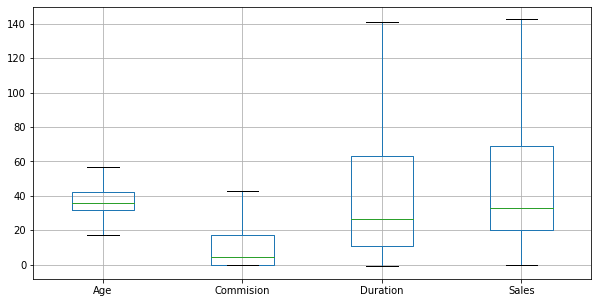

In [54]:
plt.figure(figsize = (10,5))
df_rf[['Age','Commision','Duration','Sales']].boxplot()

In [55]:
df_rf.rename(columns = {'Product Name':'Product_Name'} , inplace = True)

In [56]:
df_rf.dtypes

Age             float64
Agency_Code        int8
Type               int8
Claimed            int8
Commision       float64
Channel            int8
Duration        float64
Sales           float64
Product_Name       int8
Destination        int8
dtype: object

### RANDOM FOREST CLASSIFIER

In [57]:
X_rf = df_rf.drop('Claimed', axis = 1)
y_rf = df_rf.pop('Claimed')

In [58]:
X_train, X_test, train_labels, test_labels = train_test_split(X_rf, y_rf, test_size = .30, random_state = 1)

In [59]:
rfcl = RandomForestClassifier( random_state = 1)

In [60]:
rfcl = rfcl.fit(X_train , train_labels)

In [61]:
rfcl

RandomForestClassifier(random_state=1)

In [62]:
param_grid_rfcl = {
    'max_depth': [4 ,5],
    'max_features': [4 , 8 ],
    'min_samples_leaf': [8 ],
    'min_samples_split': [45],
    'n_estimators': [100]
}

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [63]:
grid_search_rfcl.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5], 'max_features': [4, 8],
                         'min_samples_leaf': [8], 'min_samples_split': [45],
                         'n_estimators': [100]})

In [64]:
grid_search_rfcl.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 45,
 'n_estimators': 100}

In [1]:
best_grid_rf = grid_search_rfcl.best_params_

NameError: name 'grid_search_rfcl' is not defined

In [66]:
grid_search_rfcl.best_params_

RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=8,
                       min_samples_split=45, random_state=1)

In [67]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

# MODEL 3

In [68]:
sc = StandardScaler()

In [69]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [71]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [2500],
}

nncl = MLPClassifier()

nncl.fit(X_trains , train_labels)

c:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [72]:
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [73]:
grid_search.fit(X_trains , train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [2500],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [74]:
best_grid_ann = grid_search.best_estimator_
best_grid_ann

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=2500, tol=0.01)

In [75]:
ytrain_predict = best_grid_ann.predict(X_trains)
ytest_predict = best_grid_ann.predict(X_tests)

### DECISION TREE PREDICTION

In [76]:
y_train_predict_dt = reg_dt_model.predict(X_train)

In [77]:
print("ytrain_predict" , ytrain_predict_dt.shape)

ytrain_predict (2100,)


In [78]:
cart_train_acc = reg_dt_model.score(X_train, train_labels)
cart_train_acc

0.7933333333333333

In [79]:
cart_test_acc = reg_dt_model.score(X_test, test_labels)
cart_test_acc

0.7733333333333333

In [80]:
print(classification_report(train_labels , ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [119]:
print(classification_report(test_labels , ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [81]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[1275,  196],
       [ 238,  391]], dtype=int64)

In [120]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[540,  65],
       [139, 156]], dtype=int64)

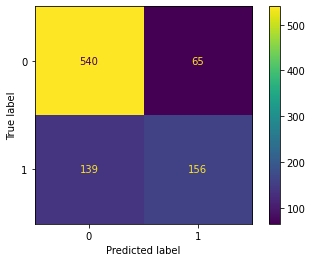

In [122]:
plot_confusion_matrix(reg_dt_model, X_test, test_labels)

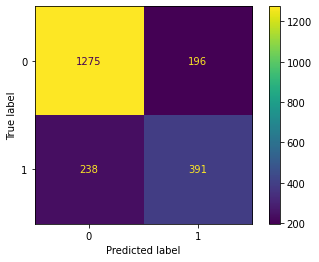

In [84]:
plot_confusion_matrix(reg_dt_model, X_train, train_labels)

### AUC AND ROC FOR DECISION TREE

AUC: 0.827


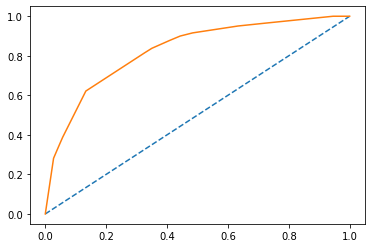

In [85]:
# predict probabilities 
probs = reg_dt_model.predict_proba(X_train) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
cart_train_auc = roc_auc_score(train_labels, probs) 
print('AUC: %.3f' % cart_train_auc) 
# calculate roc curve 
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(cart_train_fpr, cart_train_tpr)

In [86]:
cart_metrics = classification_report(train_labels, ytrain_predict_dt , output_dict = True)
df = pd.DataFrame(cart_metrics).transpose()
cart_train_f1 = round(df.loc["1"][2],2)
cart_train_recall = round(df.loc["1"][1],2)
cart_train_precision = round(df.loc["1"][0],2)
print('cart_train_precision' , cart_train_precision)
print('cart_train_recall' , cart_train_recall)
print('cart_train_f1' , cart_train_f1)

cart_train_precision 0.67
cart_train_recall 0.62
cart_train_f1 0.64


AUC: 0.790


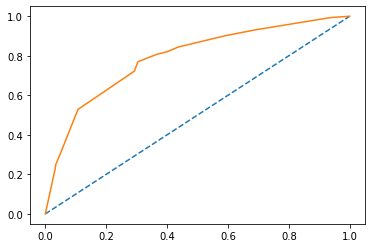

In [87]:
# predict probabilities 
probs = reg_dt_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
cart_test_auc = roc_auc_score(test_labels, probs) 
print('AUC: %.3f' % cart_test_auc) 
# calculate roc curve 
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(cart_test_fpr, cart_test_tpr)

In [88]:
cart_metrics = classification_report(test_labels, ytest_predict_dt , output_dict = True)
df = pd.DataFrame(cart_metrics).transpose()
cart_test_f1 = round(df.loc["1"][2],2)
cart_test_recall = round(df.loc["1"][1],2)
cart_test_precision = round(df.loc["1"][0],2)
print('cart_test_precision' , cart_test_precision)
print('cart_test_recall' , cart_test_recall)
print('cart_test_f1' , cart_test_f1)

cart_test_precision 0.71
cart_test_recall 0.53
cart_test_f1 0.6


# RANDOM FOREST PREDICTION

In [89]:
ytrain_predict_rf = best_grid_rf.predict(X_train)

In [90]:
print('ytrain_predict' , ytrain_predict_rf.shape)

ytrain_predict (2100,)


In [91]:
rf_train_acc = best_grid_rf.score(X_train, train_labels)
rf_train_acc

0.8085714285714286

In [92]:
rf_test_acc = best_grid_rf.score(X_test, test_labels)
rf_test_acc

0.7711111111111111

In [93]:
print(classification_report(train_labels , ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [94]:
confusion_matrix(train_labels, ytrain_predict_rf)

array([[1312,  159],
       [ 243,  386]], dtype=int64)

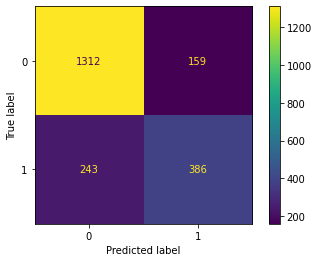

In [123]:
plot_confusion_matrix(best_grid_rf, X_train, train_labels)

AUC: 0.855


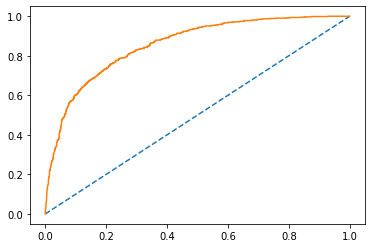

In [95]:
# predict probabilities 
probs = best_grid_rf.predict_proba(X_train) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
rf_train_auc = roc_auc_score(train_labels, probs) 
print('AUC: %.3f' % rf_train_auc) 
# calculate roc curve 
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(rf_train_fpr, rf_train_tpr)

In [96]:
rf_metrics = classification_report(train_labels, ytrain_predict_rf , output_dict = True)
df = pd.DataFrame(rf_metrics).transpose()
rf_train_f1 = round(df.loc["1"][2],2)
rf_train_recall = round(df.loc["1"][1],2)
rf_train_precision = round(df.loc["1"][0],2)
print('rf_train_precision' , rf_train_precision)
print('rf_train_recall' , rf_train_recall)
print('rf_train_f1' , rf_train_f1)

rf_train_precision 0.71
rf_train_recall 0.61
rf_train_f1 0.66


In [97]:
ytest_predict_rf = best_grid_rf.predict(X_test)

In [98]:
print('ytest_predict' , ytest_predict_rf.shape)

ytest_predict (900,)


In [99]:
rf_test_acc = best_grid_rf.score(X_test, test_labels)
rf_test_acc

0.7711111111111111

In [100]:
print(classification_report(test_labels , ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [101]:
confusion_matrix(test_labels, ytest_predict_rf)

array([[550,  55],
       [151, 144]], dtype=int64)

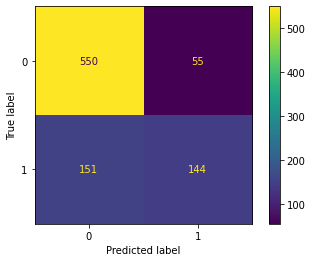

In [125]:
plot_confusion_matrix(best_grid_rf, X_test, test_labels)

AUC: 0.790


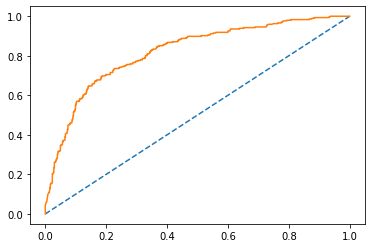

In [102]:
# predict probabilities 
probs = best_grid_rf.predict_proba(X_test) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
rf_test_auc = roc_auc_score(test_labels, probs) 
print('AUC: %.3f' % cart_test_auc) 
# calculate roc curve 
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(rf_test_fpr, rf_test_tpr)

In [103]:
rf_metrics = classification_report(test_labels, ytest_predict_rf , output_dict = True)
df = pd.DataFrame(rf_metrics).transpose()
rf_test_f1 = round(df.loc["1"][2],2)
rf_test_recall = round(df.loc["1"][1],2)
rf_test_precision = round(df.loc["1"][0],2)
print('rf_test_precision' , rf_test_precision)
print('rf_test_recall' , rf_test_recall)
print('rf_test_f1' , rf_test_f1)

rf_test_precision 0.72
rf_test_recall 0.49
rf_test_f1 0.58


# MODEL 3 ANN

In [104]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)

In [105]:
print('ytrain_predict' , ytrain_predict_ann.shape)

ytrain_predict (2100,)


In [106]:
confusion_matrix(train_labels, ytrain_predict_ann)

array([[1326,  145],
       [ 309,  320]], dtype=int64)

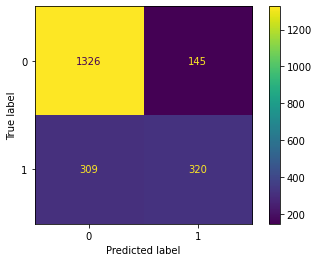

In [126]:
plot_confusion_matrix(best_grid_ann, X_trains, train_labels)

In [107]:
ann_train_acc = best_grid_ann.score(X_trains, train_labels)
ann_train_acc

0.7838095238095238

In [129]:
ann_test_acc = best_grid_ann.score(X_tests, test_labels)
ann_test_acc

0.7577777777777778

In [109]:
print(classification_report(train_labels, ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.51      0.59       629

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [130]:
print(classification_report(test_labels, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.69       900
weighted avg       0.75      0.76      0.74       900



AUC: 0.833


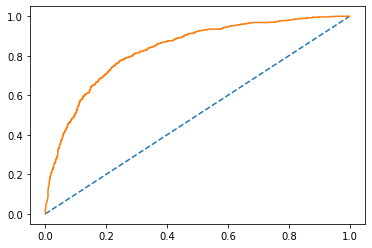

In [131]:
# predict probabilities 
probs = best_grid_ann.predict_proba(X_trains) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
ann_train_auc = roc_auc_score(train_labels, probs) 
print('AUC: %.3f' % ann_train_auc) 
# calculate roc curve 
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(ann_train_fpr,ann_train_tpr)

In [111]:
ann_metrics = classification_report(train_labels, ytrain_predict_rf , output_dict = True)
df = pd.DataFrame(rf_metrics).transpose()
ann_train_f1 = round(df.loc["1"][2],2)
ann_train_recall = round(df.loc["1"][1],2)
ann_train_precision = round(df.loc["1"][0],2)
print('ann_train_precision' , ann_train_precision)
print('ann_train_recall' , ann_train_recall)
print('ann_train_f1' , ann_train_f1)

ann_train_precision 0.72
ann_train_recall 0.49
ann_train_f1 0.58


In [112]:
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [113]:
print('ytest_predict' , ytest_predict_ann.shape)

ytest_predict (900,)


In [114]:
ann_test_acc = best_grid_ann.score(X_tests, test_labels)
ann_test_acc

0.7577777777777778

In [115]:
confusion_matrix(test_labels, ytest_predict_ann)

array([[557,  48],
       [170, 125]], dtype=int64)

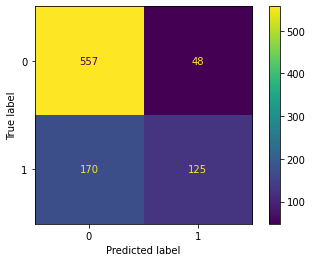

In [128]:
plot_confusion_matrix(best_grid_ann, X_tests, test_labels)

AUC: 0.809


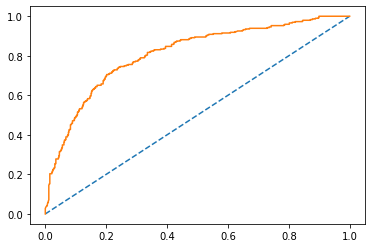

In [116]:
# predict probabilities 
probs = best_grid_ann.predict_proba(X_tests) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
ann_test_auc = roc_auc_score(test_labels, probs) 
print('AUC: %.3f' % ann_test_auc) 
# calculate roc curve 
ann_test_fpr, ann_test_tpr,ann_test_thresholds = roc_curve(test_labels, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(ann_test_fpr, ann_test_tpr)

In [133]:
ann_metrics = classification_report(test_labels, ytest_predict_rf , output_dict = True)
df = pd.DataFrame(rf_metrics).transpose()
ann_test_f1 = round(df.loc["1"][2],2)
ann_test_recall = round(df.loc["1"][1],2)
ann_test_precision = round(df.loc["1"][0],2)
print('ann_test_precision' , ann_test_precision)
print('ann_test_recall' , ann_test_recall)
print('ann_test_f1' , ann_test_f1)

ann_test_precision 0.72
ann_test_recall 0.49
ann_test_f1 0.58


# COMPARISON

In [134]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.81,0.77,0.78,0.76
AUC,0.83,0.79,0.86,0.82,0.83,0.81
Recall,0.62,0.53,0.61,0.49,0.49,0.49
Precision,0.67,0.71,0.71,0.72,0.72,0.72
F1 Score,0.64,0.60,0.66,0.58,0.58,0.58
